# **IBL - Raw Widefield Imaging Data**

This tutorial shows how to access data from <[DANDI:00XXXX](https://dandiarchive.org/dandiset/00XXXX/draft)> for the IBL widefield dataset.

## Study Overview

[TODO add description]

## Contents

1. [Setup and Data Access](#setup)
2. [Session and Subject Metadata](#metadata)
3. [Raw Imaging Data and Metadata](#raw)
4. [Synchronization signals](#nidq)

---

# 1. Setup and Data Access <a id="setup"></a>

## Import Required Libraries

In [3]:
# Core data manipulation and analysis
import matplotlib.patches as mpatches

# Visualization
import matplotlib.pyplot as plt
import numpy as np

# NWB access
from pynwb import read_nwb

# Configure matplotlib
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## Read NWB file from local path

You can read the NWB file from a local path using `pynwb.read_nwb()`.

In [4]:
subject_id = "CSK-im-011"  # Example subject
session_id = "84565bbe-fd4c-4bdb-af55-968d46a4c424"  # EID for the session

# Read NWB file from local path
nwbfile_path = f"/Volumes/T9/data/IBL/nwbfiles/sub-{subject_id}_ses-{session_id}.nwb"
nwbfile = read_nwb(nwbfile_path)

---

# 2. Session and Subject Metadata <a id="metadata"></a>

In [5]:
print("=== SESSION INFORMATION ===")
print(f"Experiment description:\n {nwbfile.experiment_description}")
print(f"Session description:\n {nwbfile.session_description}")
print(f"Session start time:\n {nwbfile.session_start_time}")

print("\n=== SUBJECT INFORMATION ===")
print(f"ID: {nwbfile.subject.subject_id}")
print(f"Age: {nwbfile.subject.age}")
print(f"Strain: {nwbfile.subject.species}")
print(f"Genotype: {nwbfile.subject.genotype}")
print(f"Sex: {nwbfile.subject.sex}")

=== SESSION INFORMATION ===
Experiment description:
 None
Session description:
 A rich text description of the experiment. Can also just be the abstract of the publication.
Session start time:
 2020-01-01 00:00:00-05:00

=== SUBJECT INFORMATION ===
ID: a_subject_id
Age: TBD
Strain: Mus musculus
Genotype: None
Sex: U


---

# 3. Raw Imaging Data and Metadata <a id="raw"></a>

## OnePhotonSeries

Raw widefield imaging data are stored as `OnePhotonSeries` objects in the NWB file's `acquisition` module. Each excitation wavelength is added to a separate `OnePhotonSeries` object.

Data shape
- Arrays are shaped `(time, x, y)` — the first dimension is time (frame), the second and third are the width and height of the image.

Series names
- Calcium (470 nm): `OnePhotonSeriesCalcium`
- Isosbestic (405 nm): `OnePhotonSeriesIsosbestic`

Access example
```python
calcium = nwbfile.acquisition['OnePhotonSeriesCalcium']
first_frame = calcium.data[0]  # lazy read of frame 0
```

In [66]:
calcium_imaging = nwbfile.acquisition["OnePhotonSeriesCalcium"]

print("=== RAW WIDEFIELD CALCIUM SIGNAL ===")
print(f"Name: {calcium_imaging.name}")
print(f"Description: {calcium_imaging.description}")
print(f"Data shape: {calcium_imaging.data.shape}")
print(f"Duration: {calcium_imaging.timestamps[-1] - calcium_imaging.timestamps[0]:.2f} seconds")

=== RAW WIDEFIELD CALCIUM SIGNAL ===
Name: OnePhotonSeriesCalcium
Description: Widefield raw imaging under blue excitation at 470 nm (GCaMP signal).
Data shape: (75569, 640, 540)
Duration: 4989.12 seconds


In [67]:
isosbestic_imaging = nwbfile.acquisition["OnePhotonSeriesIsosbestic"]

print("=== RAW WIDEFIELD ISOSBESTIC SIGNAL ===")
print(f"Name: {isosbestic_imaging.name}")
print(f"Description: {isosbestic_imaging.description}")
print(f"Data shape: {isosbestic_imaging.data.shape}")
print(f"Duration: {isosbestic_imaging.timestamps[-1] - isosbestic_imaging.timestamps[0]:.2f} seconds")

=== RAW WIDEFIELD ISOSBESTIC SIGNAL ===
Name: OnePhotonSeriesIsosbestic
Description: Widefield raw imaging under violet excitation at 405 nm (isosbestic control).
Data shape: (75569, 640, 540)
Duration: 4989.12 seconds


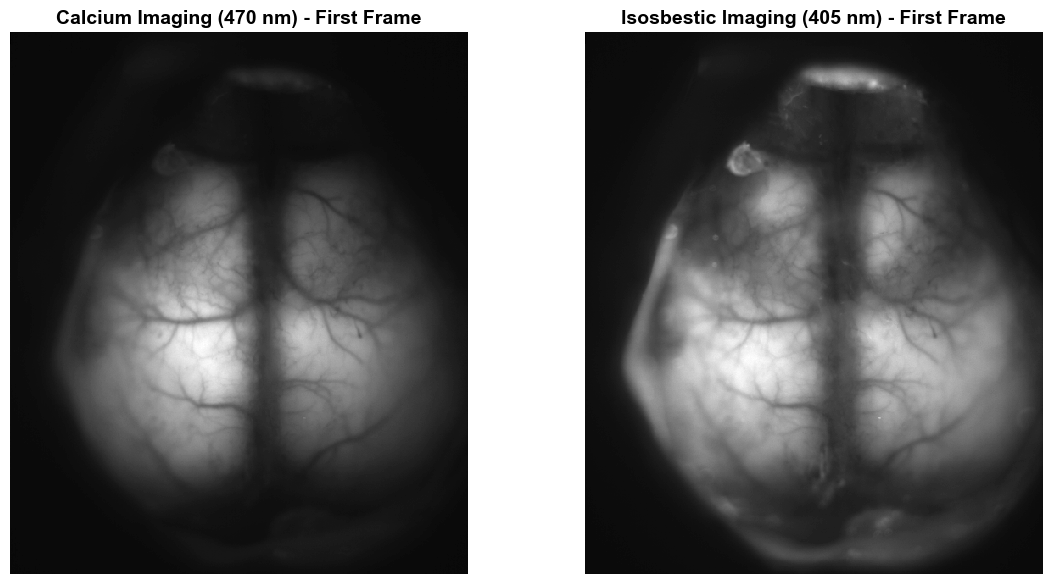

In [69]:
# Plot with matplotlib (example)
# To transpose back to height x width, use .data[0, ...].T

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, dpi=100)
axes[0].imshow(calcium_imaging.data[0, ...], cmap='gray')
axes[0].set_title('Calcium Imaging (470 nm) - First Frame')
axes[0].axis('off')
axes[1].imshow(isosbestic_imaging.data[0, ...], cmap='gray')
axes[1].set_title('Isosbestic Imaging (405 nm) - First Frame')
axes[1].axis('off')
plt.tight_layout()
plt.show()

## Imaging Metadata


In [59]:
print("=== IMAGING METADATA ===")
print("All imaging metadata are stored in the imaging module in imaging_planes:")
print("-" * 100)
for imaging_plane_name in nwbfile.imaging_planes:
    imaging_plane = nwbfile.imaging_planes[imaging_plane_name]
    print(f"Imaging Plane: {imaging_plane_name}")
    print("-" * 100)
    print(f"  Description: {imaging_plane.description}")
    print(f"  Imaging Rate: {imaging_plane.imaging_rate} Hz")
    print(f"  Optical Channel: {imaging_plane.optical_channel[0].name}, {imaging_plane.optical_channel[0].description}")
    print(f"  Indicator: {imaging_plane.indicator}")
    print(f"  Excitation Wavelength: {imaging_plane.excitation_lambda} nm")
    print(f"  Emission Wavelength: {imaging_plane.optical_channel[0].emission_lambda} nm")
    print(f"  Location: {imaging_plane.location}")
    print("-"*100)

=== IMAGING METADATA ===
All imaging metadata are stored in the imaging module in imaging_planes:
----------------------------------------------------------------------------------------------------
Imaging Plane: ImagingPlaneCalcium
----------------------------------------------------------------------------------------------------
  Description: The imaging plane for calcium imaging from Blue light excitation.
  Imaging Rate: 15.0 Hz
  Optical Channel: OpticalChannel, GCaMP Ca2+ bound emission (calcium signal). (Thorlabs, cat. no. M470L4)
  Indicator: GCaMP6f
  Excitation Wavelength: 470.0 nm
  Emission Wavelength: 510.0 nm
  Location: unknown
----------------------------------------------------------------------------------------------------
Imaging Plane: ImagingPlaneIsosbestic
----------------------------------------------------------------------------------------------------
  Description: The imaging plane for calcium imaging from Violet light excitation.
  Imaging Rate: 15.0 Hz

---

# 4. Synchronization signals <a id="nidq"></a>



## Digital Signals


In [5]:
event_names = [name for name in nwbfile.acquisition if "Events" in name]
print("=== SYNCHRONIZATION EVENTS IN ACQUISITION ===")
print("-" * 100)
for name in event_names:
    print(f"  Name: {name}")
    print(f"  Description: {nwbfile.acquisition[name].description}")

=== SYNCHRONIZATION EVENTS IN ACQUISITION ===
----------------------------------------------------------------------------------------------------
  Name: EventsAudio
  Description: Auditory stimulus presentation events.
Labels: 'audio_off' = Audio stimulus off; 'audio_on' = Audio stimulus on.
Marks timing of audio stimulus delivery for auditory tasks or cue presentation.

  Name: EventsBodyCamera
  Description: Video frame acquisition times for the body camera.
Labels: 'exposure_end' = Camera exposure end or frame readout complete;
'frame_start' = Camera frame acquisition start (frame timestamp).
Each ON event marks when a video frame was captured by the camera,
enabling temporal alignment of behavior videos with neural and task data.

  Name: EventsFrame2ttl
  Description: Monitor refresh events detected by photodiode for visual stimulus timing.
Labels: 'screen_dark' = Screen transitioned to dark (photodiode detected low luminance);
'screen_bright' = Screen transitioned to bright (ph

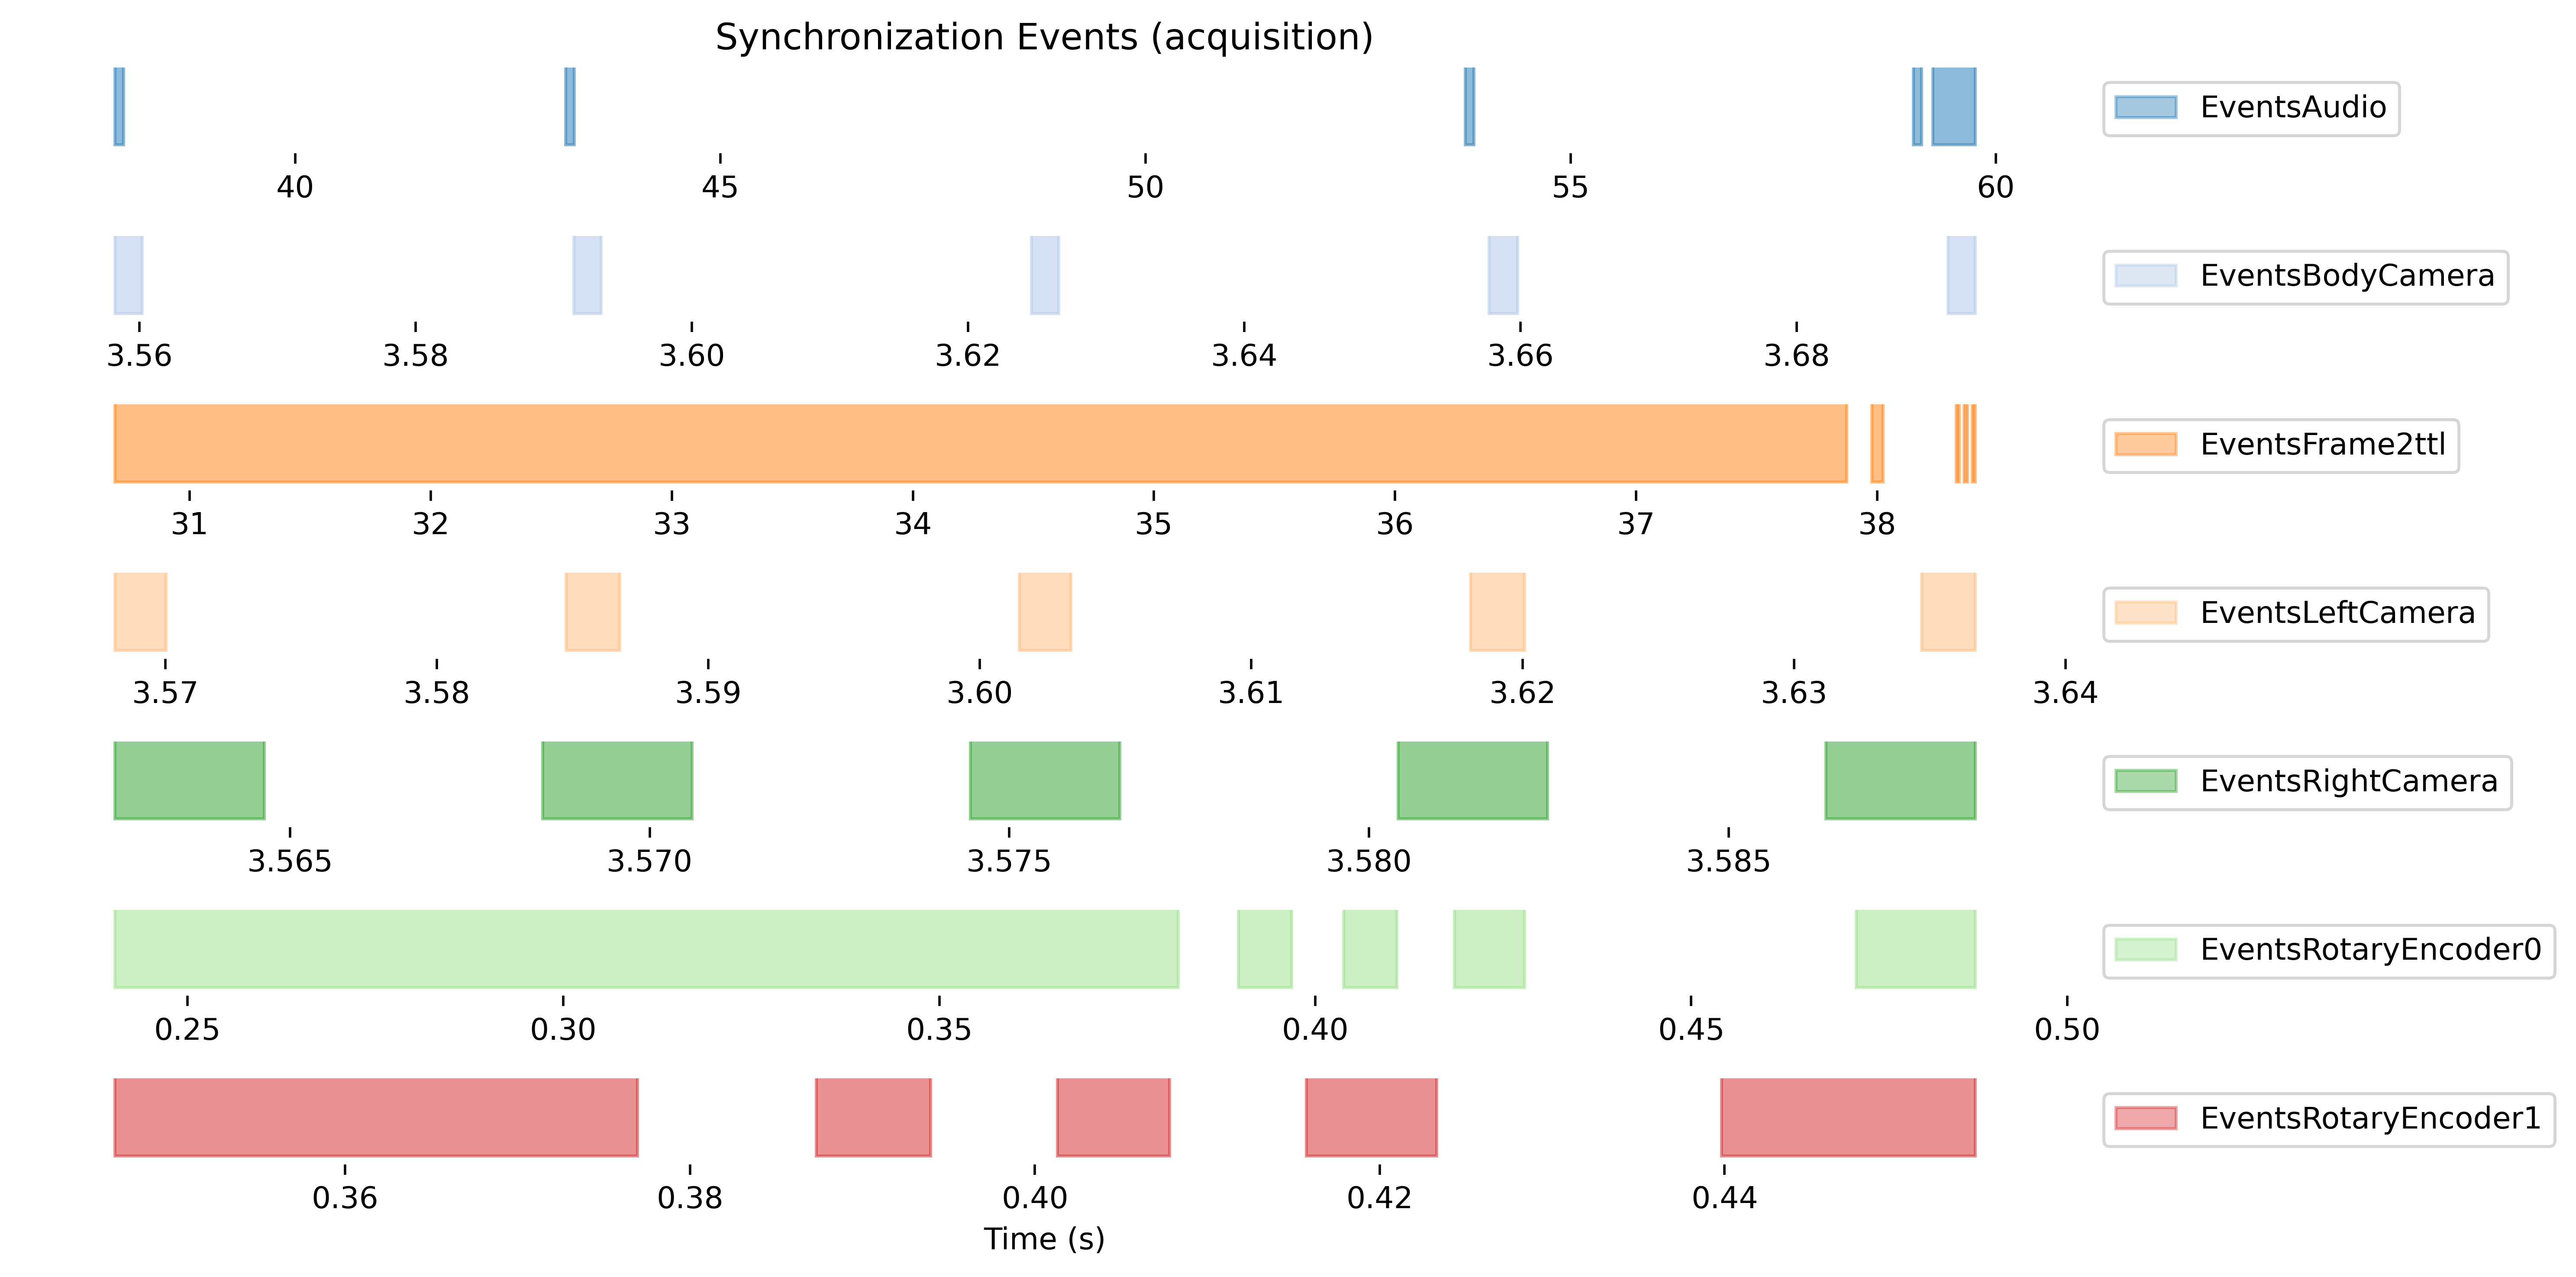

In [40]:
from itertools import cycle

fig, axes = plt.subplots(len(event_names), 1, dpi=500)

num_events = 5  # number of on-off events to plot
y_base = 0.1
y_height = 1.0  # use same vertical band for all shaded spans

cmap = plt.get_cmap('tab20')
color_cycle = cycle([cmap(i) for i in range(cmap.N)])
for i, event_name in enumerate(event_names):
    event = nwbfile.acquisition[event_name]
    times = event.timestamps[:num_events*2]
    data = event.data[:num_events*2]

    on_times = times[data == 1]
    off_times = times[data == 0]
    color = next(color_cycle)

    legend_patches = [mpatches.Patch(color=color, alpha=0.4, label=event_name)]
    for t0, t1 in zip(on_times, off_times):
        axes[i].axvspan(t0, t1, ymin=y_base, ymax=y_base + y_height, color=color, alpha=0.5)

    if i == 0:
        axes[i].set_title("Synchronization Events (acquisition)")
    # compact legend
    axes[i].legend(handles=legend_patches, bbox_to_anchor=(1.01, 1), loc='upper left')
    if i == len(event_names) - 1:
        axes[i].set_xlabel("Time (s)")
    # set axis frame off
    axes[i].set_frame_on(False)
    axes[i].set_yticks([])

plt.tight_layout()  # leave room for legend
plt.show()


## Analog Signals

In [41]:
analog_signal_names = [name for name in nwbfile.acquisition if "TimeSeries" in name]
print("=== SYNCHRONIZATION SIGNALS IN ACQUISITION ===")
print("-" * 100)
for name in analog_signal_names:
    print(f"  Name: {name}")
    print(f"  Description: {nwbfile.acquisition[name].description}")

=== SYNCHRONIZATION SIGNALS IN ACQUISITION ===
----------------------------------------------------------------------------------------------------
  Name: TimeSeriesBpod
  Description: Analog signal from Bpod behavioral control system.
This continuous voltage signal encodes behavioral state machine events and timestamps from the Bpod system,
which controls stimulus presentation and reward delivery during tasks.
The analog encoding allows precise temporal alignment between Bpod events and neural recordings.



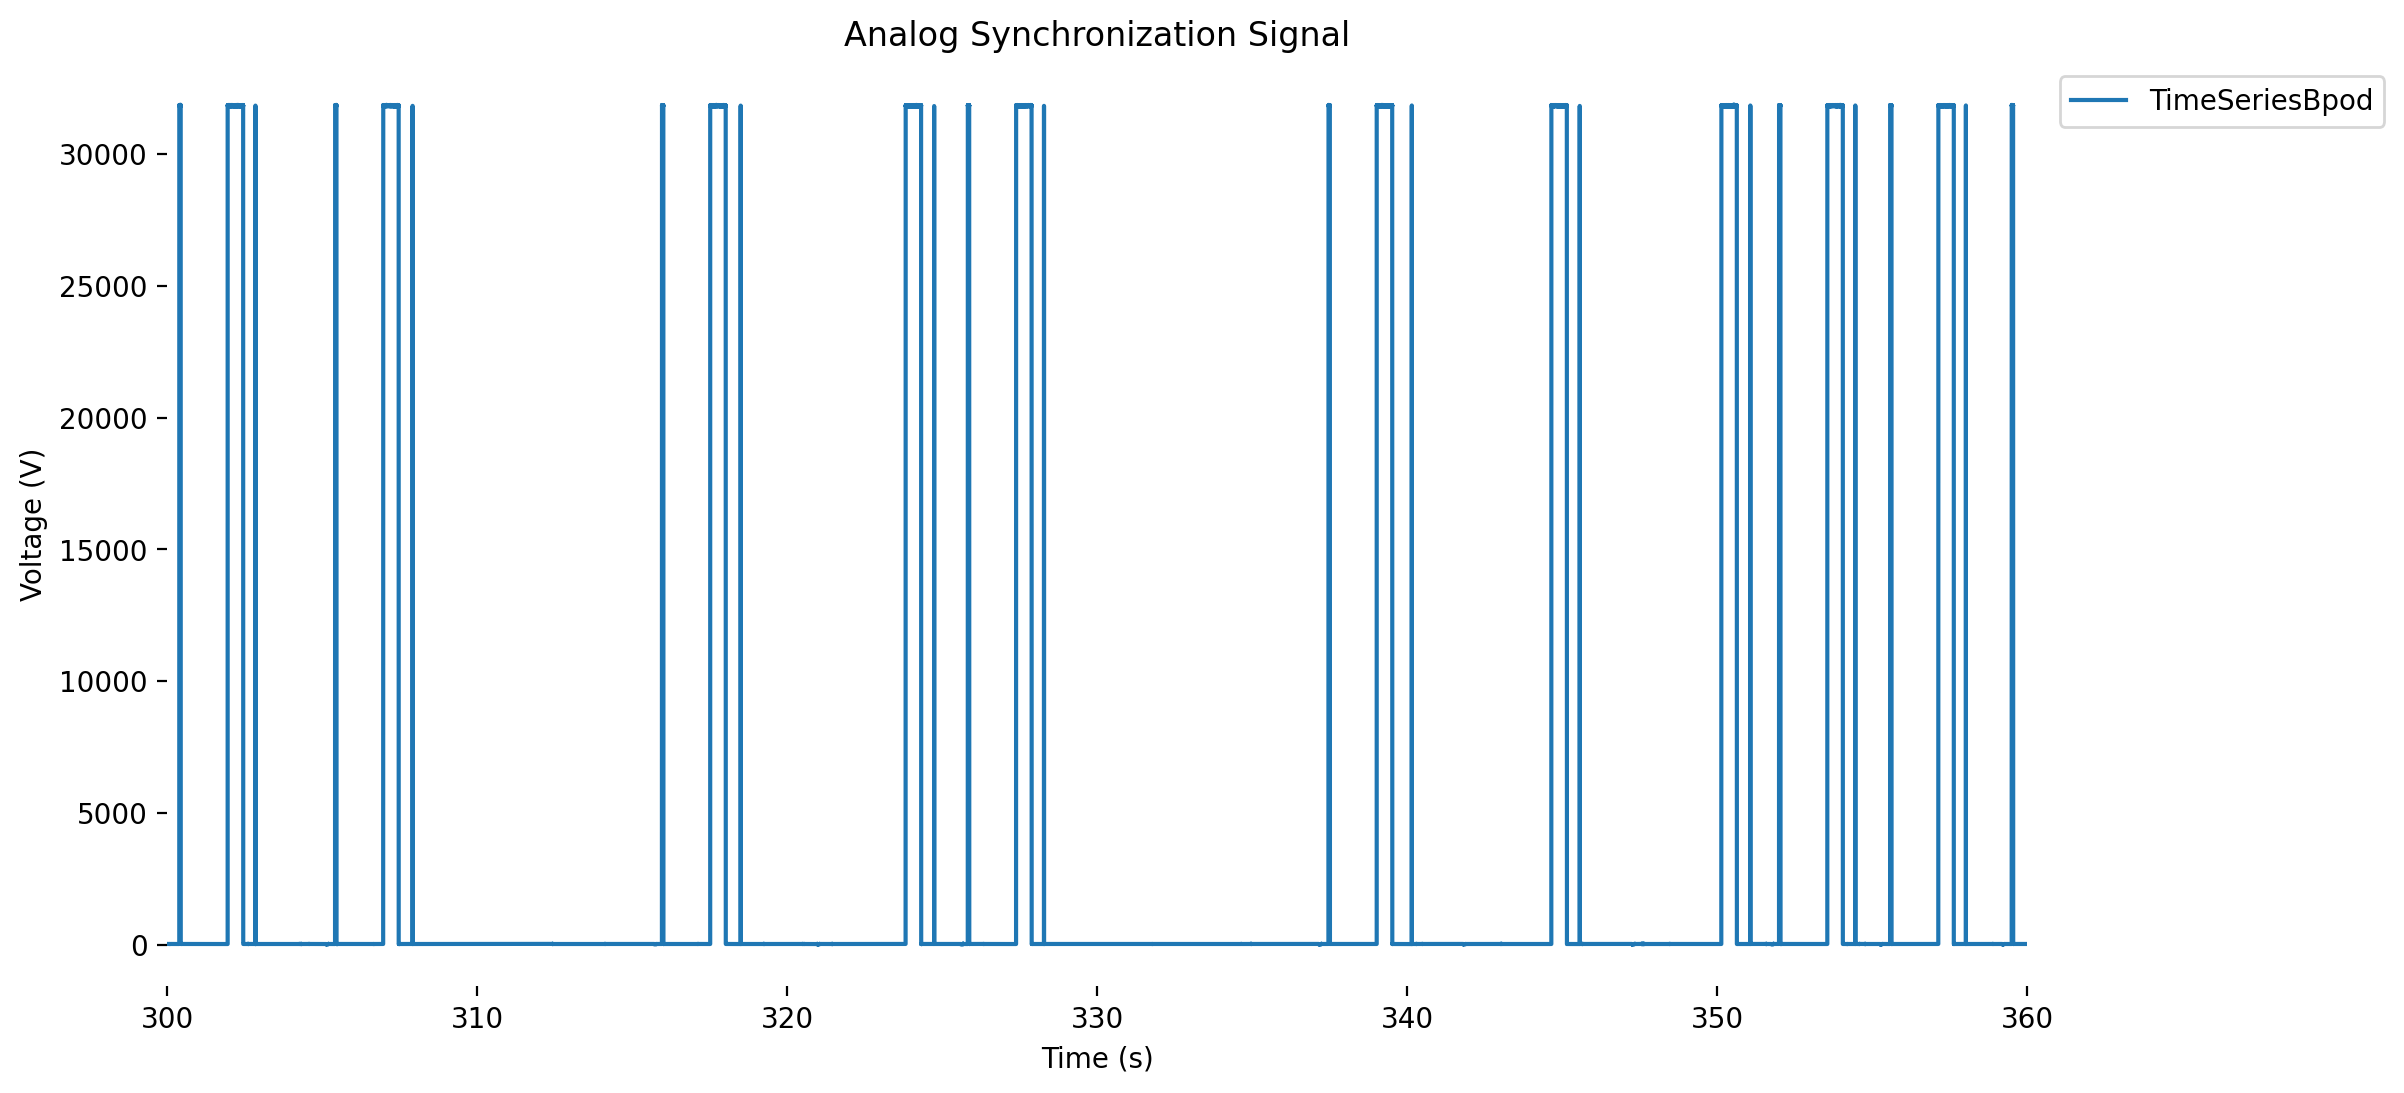

In [57]:
signal_name = "TimeSeriesBpod"
analog_signal = nwbfile.acquisition[signal_name]
rate = analog_signal.rate

# desired time window (minutes)
start_min, end_min = 5, 6
start_sec, end_sec = start_min * 60, end_min * 60

# convert absolute seconds to sample indices (respecting starting_time)
start_idx = int((start_sec - analog_signal.starting_time) * rate)
end_idx = int((end_sec - analog_signal.starting_time) * rate)

# clamp to valid range
start_idx = max(0, start_idx)
end_idx = min(len(analog_signal.data), end_idx)

data_slice = analog_signal.data[start_idx:end_idx]
times = analog_signal.starting_time + np.arange(start_idx, end_idx) / rate

fig, ax = plt.subplots(dpi=200)
ax.plot(times, data_slice, label=signal_name)
ax.set_xlim(start_sec, end_sec)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (V)")
ax.set_title("Analog Synchronization Signal")
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
ax.set_frame_on(False)
plt.show()